# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Widi Tri Nurhasanah]
- **Email:** [wtrinurhasanah@gmail.com]
- **ID Dicoding:** [Widi Tri Nurhasanah]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana perbandingan distribusi penyewa kasual dibandingkan dengan penyewa terdaftar pada tahun 2011 dan 2012?
- Pertanyaan 2: Apakah hari libur mempengaruhi jumlah penggunaan sepeda kasual dibandingkan dengan hari kerja dalam periode tahun 2011 dan 2012?
- Pertanyaan 3: Di musim apa jumlah penyewa sepeda paling banyak dalam periode tahun 2011 dan 2012?
- Pertanyaan 4: Jam berapa yang paling sering digunakan oleh penyewa kasual dan terdaftar untuk menyewa sepeda pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [208]:
data_day = pd.read_csv("data/day.csv")
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- data_day = pd.read_csv("data/day.csv"):
Ini membaca file CSV bernama day.csv yang berada di dalam folder data. Fungsi pd.read_csv() digunakan untuk memuat data dari file CSV ke dalam DataFrame Pandas, yaitu struktur data berbentuk tabel.
Setelah dibaca, data tersebut disimpan dalam variabel data_day.

- data_day.head():
Fungsi head() menampilkan lima baris pertama dari DataFrame data_day. Ini berguna untuk mendapatkan gambaran awal tentang isi data, seperti kolom apa saja yang ada dan beberapa contoh baris pertama.

- Dataset ini berisi informasi harian dengan kolom seperti dteday, season, yr, mnth, hr, holiday, dan workingday.
Kolom terakhir, cnt, menunjukkan total sepeda yang terdaftar dan tidak terdaftar yang digunakan setiap harinya.
Dari lima baris pertama, terlihat variasi jumlah pengguna sepeda yang terdaftar (registered) dan yang tidak terdaftar (casual). Jumlah pengguna terdaftar cenderung lebih tinggi dibandingkan dengan pengguna tidak terdaftar.

In [209]:
data_hour = pd.read_csv("data/hour.csv")
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- data_hour = pd.read_csv("data/hour.csv"):
Kode ini membaca file CSV bernama hour.csv yang berada di dalam folder data. Fungsi pd.read_csv() digunakan untuk memuat data dari file CSV ke dalam DataFrame Pandas.
Setelah proses ini, data dari file hour.csv disimpan dalam variabel data_hour.

- data_hour.head():
Fungsi head() menampilkan lima baris pertama dari DataFrame data_hour. Ini berguna untuk memberikan gambaran awal tentang isi data, termasuk kolom-kolom yang ada dan beberapa contoh nilai pada baris pertama.

- Dataset ini mirip dengan data_day, namun resolusinya per jam.
Kolom instant menunjukkan waktu berurutan, dan ada kolom tambahan hr yang merepresentasikan jam dalam satu hari.
Dari lima baris pertama, terlihat bahwa data pengguna sepeda bervariasi sepanjang hari, dengan puncak pada jam-jam tertentu seperti pagi atau sore (sesuai jam kerja atau waktu sibuk).

### Assessing Data

In [210]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight :**

- Tidak ada nilai yang hilang di seluruh kolom, karena setiap kolom memiliki jumlah 731 nilai non-null. Ini berarti dataset lengkap dan siap untuk dianalisis tanpa perlu menangani missing values.

- Sebagian besar kolom menggunakan tipe data yang tepat, seperti int64 untuk kategori seperti season, yr, mnth, dan status operasional (holiday, workingday). Selain itu, variabel numerik seperti temp, atemp, hum, dan windspeed menggunakan tipe data float64, yang juga sudah sesuai.

- Kolom dteday bertipe object, yang biasanya digunakan untuk string atau teks, padahal kolom ini merepresentasikan tanggal. Idealnya, tipe data untuk kolom ini harus diubah ke datetime agar bisa dianalisis secara lebih tepat, terutama untuk analisis berdasarkan waktu (time series).

- Dataset ini hanya menggunakan sekitar 91.5 KB memori, yang berarti ukurannya kecil dan efisien untuk diproses.

In [211]:
data_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:** 

Kode **`data_day.isna().sum()`** digunakan untuk memeriksa adanya nilai yang hilang dalam setiap kolom dari *DataFrame* `data_day`. Fungsi `isna()` mendeteksi nilai yang hilang (*NaN*), dan `sum()` menghitung jumlah nilai tersebut untuk setiap kolom. Hasilnya menunjukkan bahwa tidak ada nilai yang hilang dalam seluruh kolom, karena semua kolom memiliki jumlah nilai *NaN* sebesar 0. Ini mengindikasikan bahwa dataset tersebut lengkap, tanpa ada data yang kosong di setiap kolomnya.

In [212]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight :**

- Setiap kolom dalam DataFrame data_hour memiliki 17.379 nilai non-null, yang berarti dataset ini lengkap dan tidak ada nilai yang hilang (missing values).

- Sebagian besar kolom memiliki tipe data int64, yang cocok untuk kategori seperti tahun (yr), bulan (mnth), jam (hr), dan status seperti holiday dan workingday. Kolom yang berhubungan dengan variabel cuaca dan suhu, seperti temp, atemp, hum, dan windspeed, menggunakan tipe data float64, yang juga sesuai untuk variabel numerik berkesinambungan.

- Kolom seperti dteday bertipe object, menunjukkan bahwa ini adalah data non-numerik, kemungkinan berupa tanggal. Kolom ini mungkin perlu diubah ke tipe data datetime untuk analisis waktu yang lebih akurat.

- Dengan ukuran 2.3 MB, DataFrame ini relatif ringan, sehingga dapat diproses secara efisien bahkan dalam lingkungan komputasi terbatas.

In [213]:
data_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**

Tidak ada nilai yang hilang di semua kolom dataset. Ini ditunjukkan oleh semua nilai 0 di setiap kolom.
Dengan tidak adanya data yang hilang, dataset berada dalam kondisi yang baik untuk dianalisis lebih lanjut.

### Cleaning Data

In [214]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [215]:
data_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [216]:
rename_data_day = {
    "instant" : "Instan", "dteday" : "TanggalWaktu", "season" : "Musim",
    "yr" : "Tahun", "mnth" : "Bulan", "hr": "Jam", "holiday" : "Libur",
    "weekday" : "HariKerja", "workingday" : "HariKerjaAktif", "weathersit" : "KondisiCuaca",
    "temp" : "Suhu" ,"atemp" : "SuhuTerasa", "hum" : "Kelembaban",
    "windspeed": "KecepatanAngin", "casual" : "Kasual", "registered" : "Terdaftar", "cnt" : "Jumlah"
}
data_day.rename(columns = rename_data_day, inplace = True)
data_day.head()

,Instan,TanggalWaktu,Musim,Tahun,Bulan,Libur,HariKerja,HariKerjaAktif,KondisiCuaca,Suhu,SuhuTerasa,Kelembaban,KecepatanAngin,Kasual,Terdaftar,Jumlah
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [217]:
data_day['Suhu Celcius'] = data_day['Suhu'] * 41
data_day['SuhuTerasa Celcius'] = data_day["SuhuTerasa"] * 50
data_day.head()

,Instan,TanggalWaktu,Musim,Tahun,Bulan,Libur,HariKerja,HariKerjaAktif,KondisiCuaca,Suhu,SuhuTerasa,Kelembaban,KecepatanAngin,Kasual,Terdaftar,Jumlah,Suhu Celcius,SuhuTerasa Celcius
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847,18.18125
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.902598,17.68695
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.050924,9.47025
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.200000,10.60610
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.305237,11.46350


In [218]:
data_day['Tahun'] = data_day['Tahun'].replace({0: '2011', 1: '2012'})
data_day['Musim'] = data_day['Musim'].replace({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})
data_day.head()


,Instan,TanggalWaktu,Musim,Tahun,Bulan,Libur,HariKerja,HariKerjaAktif,KondisiCuaca,Suhu,SuhuTerasa,Kelembaban,KecepatanAngin,Kasual,Terdaftar,Jumlah,Suhu Celcius,SuhuTerasa Celcius
0,1,2011-01-01,Musim Semi,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847,18.18125
1,2,2011-01-02,Musim Semi,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.902598,17.68695
2,3,2011-01-03,Musim Semi,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.050924,9.47025
3,4,2011-01-04,Musim Semi,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.200000,10.60610
4,5,2011-01-05,Musim Semi,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.305237,11.46350


In [219]:
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [220]:
data_hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [221]:
rename_data_hour = {
    "instant" : "Instan", "dteday" : "TanggalWaktu", "season" : "Musim",
    "yr" : "Tahun", "mnth" : "Bulan", "hr": "Jam", "holiday" : "Libur",
    "weekday" : "HariKerja", "workingday" : "HariKerjaAktif", "weathersit" : "KondisiCuaca",
    "temp" : "Suhu", "atemp" : "SuhuTerasa", "hum" : "Kelembaban",
    "windspeed": "KecepatanAngin", "casual" : "Kasual", "registered" : "Terdaftar", "cnt" : "Jumlah"
}
data_hour.rename(columns = rename_data_hour, inplace = True)
data_hour.head()


,Instan,TanggalWaktu,Musim,Tahun,Bulan,Jam,Libur,HariKerja,HariKerjaAktif,KondisiCuaca,Suhu,SuhuTerasa,Kelembaban,KecepatanAngin,Kasual,Terdaftar,Jumlah
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [222]:
data_hour['Suhu Celcius'] = data_hour['Suhu'] * 41
data_hour['SuhuTerasa Celcius'] = data_hour["SuhuTerasa"] * 50
data_hour.head()


,Instan,TanggalWaktu,Musim,Tahun,Bulan,Jam,Libur,HariKerja,HariKerjaAktif,KondisiCuaca,Suhu,SuhuTerasa,Kelembaban,KecepatanAngin,Kasual,Terdaftar,Jumlah,Suhu Celcius,SuhuTerasa Celcius
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,9.84,14.395
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,9.02,13.635
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,9.02,13.635
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,9.84,14.395
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,9.84,14.395


In [223]:
data_hour['Tahun'] = data_hour['Tahun'].replace({0: '2011', 1: '2012'})
data_hour['Musim'] = data_hour['Musim'].replace({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})
data_hour.head()


,Instan,TanggalWaktu,Musim,Tahun,Bulan,Jam,Libur,HariKerja,HariKerjaAktif,KondisiCuaca,Suhu,SuhuTerasa,Kelembaban,KecepatanAngin,Kasual,Terdaftar,Jumlah,Suhu Celcius,SuhuTerasa Celcius
0,1,2011-01-01,Musim Semi,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,9.84,14.395
1,2,2011-01-01,Musim Semi,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,9.02,13.635
2,3,2011-01-01,Musim Semi,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,9.02,13.635
3,4,2011-01-01,Musim Semi,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,9.84,14.395
4,5,2011-01-01,Musim Semi,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,9.84,14.395


**Insight:**
- Cleaning data dilakukan untuk mengubah kolom dteday menjadi datetime. Selain itu untuk mengubah nama pada header menjadi	Instan,	TanggalWaktu,	Musim,	Tahun,Bulan,	Jam,	Libur,	HariKerja,	HariKerjaAktif,	KondisiCuaca,	Suhu,	SuhuTerasa,	Kelembaban,	KecepatanAngin,	Kasual.	Terdaftar,	Jumlah, Suhu Celcius, dan SuhuTerasa Celcius.

## Exploratory Data Analysis (EDA)

### Explore ...

In [224]:
data_day.describe()

,Instan,TanggalWaktu,Bulan,Libur,HariKerja,HariKerjaAktif,KondisiCuaca,Suhu,SuhuTerasa,Kelembaban,KecepatanAngin,Kasual,Terdaftar,Jumlah,Suhu Celcius,SuhuTerasa Celcius
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,20.310776,23.717699
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,2.424346,3.953480
25%,183.500000,2011-07-02 12:00:00,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,13.820424,16.892125
50%,366.000000,2012-01-01 00:00:00,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,20.431653,24.336650
75%,548.500000,2012-07-01 12:00:00,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,26.872076,30.430100
max,731.000000,2012-12-31 00:00:00,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,35.328347,42.044800
std,211.165812,NaN,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,7.505091,8.148059


In [225]:
pivot_table_season_weathers = pd.pivot_table(data_day, values=['Kasual', 'Terdaftar'], index=['Tahun', 'Musim', 'KondisiCuaca'], columns=['Bulan'], aggfunc='sum')
pivot_table_season_weathers.fillna(0).astype(int)


Kasual                                    \
Bulan                               1     2      3      4      5      6    
Tahun Musim        KondisiCuaca                                            
2011  Musim Dingin 1                 0     0      0      0      0      0   
                   2                 0     0      0      0      0      0   
                   3                 0     0      0      0      0      0   
      Musim Gugur  1                 0     0      0      0      0   7939   
                   2                 0     0      0      0      0   2374   
                   3                 0     0      0      0      0      0   
      Musim Panas  1                 0     0   2280  12419  21587  14655   
                   2                 0     0   1410   9806   9463   5644   
                   3                 0     0    179    121      0      0   
      Musim Semi   1              1543  5386   6895      0      0      0   
                   2              1496   856   2016      0      0      0   
                   3                34     0     46      0      0      0   
2012  Musim Dingin 1                 0     0      0      0      0      0   
                   2                 0     0      0      0      0      0   
                   3                 0     0      0      0      0      0   
      Musim Gugur  1                 0     0      0      0      0  13448   
                   2                 0     0      0      0      0      0   
                   3                 0     0      0      0      0      0   
      Musim Panas  1                 0     0   4168  33187  31894  26198   
                   2                 0     0   9253   5149  12341   3648   
                   3                 0     0      0    120      0      0   
      Musim Semi   1              7244  6163  10638      0      0      0   
                   2              1725  2366   7559      0      0      0   
                   3                 0   192      0      0      0      0   

                                                             ... Terdaftar  \
Bulan                               7      8      9      10  ...        3    
Tahun Musim        KondisiCuaca                              ...             
2011  Musim Dingin 1                 0      0   1483  20045  ...         0   
                   2                 0      0   5219   4649  ...         0   
                   3                 0      0      0    528  ...         0   
      Musim Gugur  1             29781  21755  12013      0  ...         0   
                   2              6671   7087   7355      0  ...         0   
                   3                 0      0    475      0  ...         0   
      Musim Panas  1                 0      0      0      0  ...      9582   
                   2                 0      0      0      0  ...      7882   
                   3                 0      0      0      0  ...      1506   
      Musim Semi   1                 0      0      0      0  ...     20946   
                   2                 0      0      0      0  ...     10726   
                   3                 0      0      0      0  ...       577   
2012  Musim Dingin 1                 0      0   9691  20858  ...         0   
                   2                 0      0   1796  13363  ...         0   
                   3                 0      0      0    317  ...         0   
      Musim Gugur  1             31332  27912  23765      0  ...         0   
                   2              9109  15285   8526      0  ...         0   
                   3              1264      0      0      0  ...         0   
      Musim Panas  1                 0      0      0      0  ...     25194   
                   2                 0      0      0      0  ...     25401   
                   3                 0      0      0      0  ...         0   
      Musim Semi   1                 0      0      0      0  ...     60286   
                   2         

**Insight :**

**Kategori Kasual**
- Musim Gugur dan Musim Panas memiliki jumlah pendaftar kasual tertinggi, terutama pada bulan Agustus hingga Oktober.
- Pada tahun 2012, peningkatan pendaftar kasual jauh lebih besar dibandingkan tahun 2011, dengan Oktober 2012 menjadi puncak aktivitas kasual.

**Kategori Terdaftar**
- Musim Gugur dan Musim Panas adalah musim dengan jumlah pendaftar terdaftar tertinggi di kedua tahun.
- Puncak aktivitas pendaftaran terdaftar terjadi di Oktober 2012, dengan lebih dari 115,000 pendaftar terdaftar.

Perbandingan Kasual dan Terdaftar:
- Kedua kategori menunjukkan tren yang mirip, di mana Musim Gugur dan Musim Panas memiliki angka pendaftaran tertinggi.
- Pada tahun 2012, jumlah pendaftar di kedua kategori meningkat drastis dibandingkan tahun 2011, terutama di bulan Oktober dan selama Musim Semi dan Musim Panas.
- Jumlah pendaftar kasual lebih tinggi di sebagian besar bulan dibandingkan dengan terdaftar, terutama di puncak musim (Juli, Agustus, dan Oktober).

In [226]:
data_hour.describe()

,Instan,TanggalWaktu,Bulan,Jam,Libur,HariKerja,HariKerjaAktif,KondisiCuaca,Suhu,SuhuTerasa,Kelembaban,KecepatanAngin,Kasual,Terdaftar,Jumlah,Suhu Celcius,SuhuTerasa Celcius
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,20.376474,23.788755
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000
25%,4345.5000,2011-07-04 00:00:00,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,13.940000,16.665000
50%,8690.0000,2012-01-02 00:00:00,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,20.500000,24.240000
75%,13034.5000,2012-07-02 00:00:00,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,27.060000,31.060000
max,17379.0000,2012-12-31 00:00:00,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,41.000000,50.000000
std,5017.0295,NaN,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,7.894801,8.592511


**Insight :**

Diketahui bahwa rata-rata pengguna Kasual per jamnya adalah 35 orang, sedangkan pengguna Terdaftar berjumlah rata-rata 153 orang. Pada jam maxnya, jumlah pengguna Kasual mencapai 367 orang, dan pengguna Terdaftar mencapai 886 orang.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan distribusi penyewa kasual dibandingkan dengan penyewa terdaftar pada tahun 2011 dan 2012?

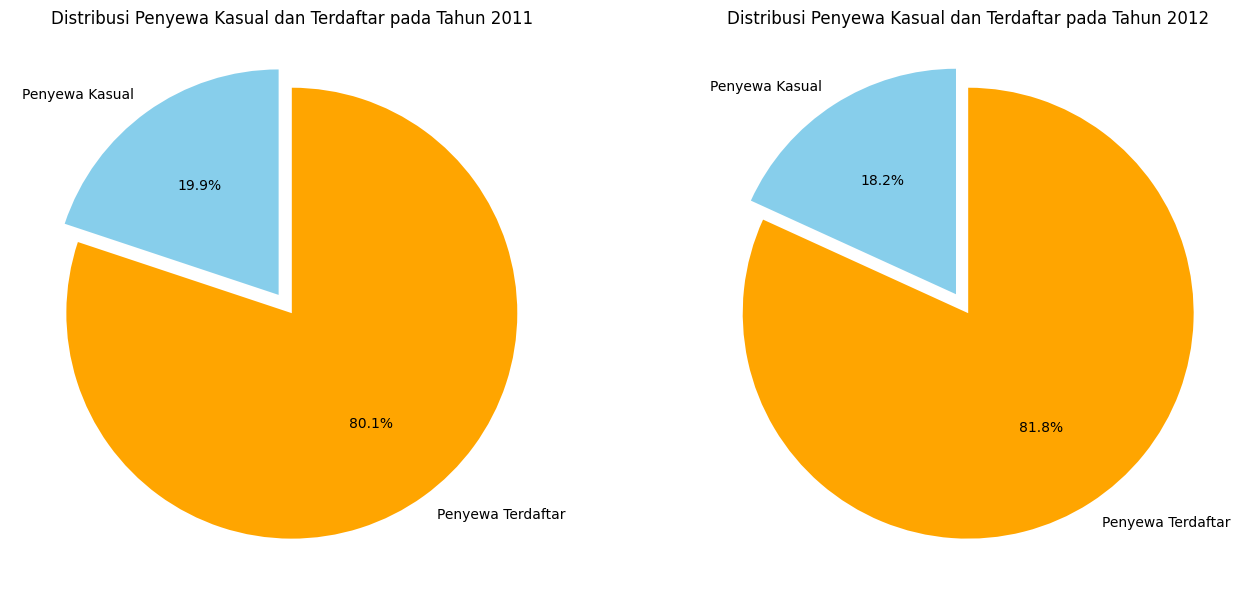

In [227]:
data_day['TanggalWaktu'] = pd.to_datetime(data_day['TanggalWaktu'])

# Hitung total penyewa kasual dan terdaftar untuk tahun 2011
data_2011 = data_day[data_day['TanggalWaktu'].dt.year == 2011]
total_casual_2011 = data_2011['Kasual'].sum()
total_registered_2011 = data_2011['Terdaftar'].sum()
labels = ['Penyewa Kasual', 'Penyewa Terdaftar']
sizes_2011 = [total_casual_2011, total_registered_2011]

# Hitung total penyewa kasual dan terdaftar untuk tahun 2012
data_2012 = data_day[data_day['TanggalWaktu'].dt.year == 2012]
total_casual_2012 = data_2012['Kasual'].sum()
total_registered_2012 = data_2012['Terdaftar'].sum()
sizes_2012 = [total_casual_2012, total_registered_2012]

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart untuk tahun 2011
axs[0].pie(sizes_2011, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'], explode=(0.1, 0))
axs[0].set_title('Distribusi Penyewa Kasual dan Terdaftar pada Tahun 2011')

# Pie chart untuk tahun 2012
axs[1].pie(sizes_2012, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'], explode=(0.1, 0))
axs[1].set_title('Distribusi Penyewa Kasual dan Terdaftar pada Tahun 2012')
plt.show()

**Insight:**
- *Tahun 2011:* Mayoritas pengguna layanan adalah penyewa terdaftar, yang mencapai 80.1% dari total penyewa. Sementara itu, penyewa kasual hanya menyumbang 19.9% dari total.
- *Tahun 2012:* Ada sedikit perubahan, di mana proporsi penyewa kasual menurun menjadi 18.2%, sedangkan penyewa terdaftar meningkat sedikit menjadi 81.8%.

### Pertanyaan 2: Apakah hari libur mempengaruhi jumlah penggunaan sepeda kasual dibandingkan dengan hari kerja dalam periode tahun 2011 dan 2012?

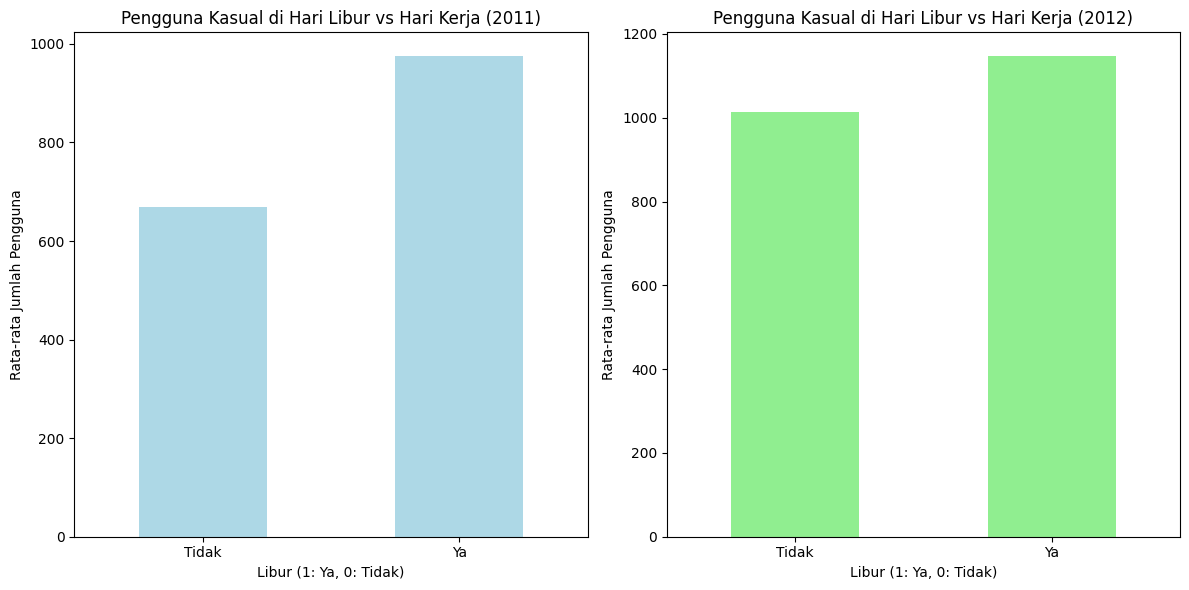

In [228]:
data_day['TanggalWaktu'] = pd.to_datetime(data_day['TanggalWaktu'])

tahun_data_2011 = data_day[data_day['TanggalWaktu'].dt.year == 2011]
libur_vs_kerja_2011 = tahun_data_2011.groupby('Libur')['Kasual'].mean()

tahun_data_2012 = data_day[data_day['TanggalWaktu'].dt.year == 2012]
libur_vs_kerja_2012 = tahun_data_2012.groupby('Libur')['Kasual'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot untuk tahun 2011
libur_vs_kerja_2011.plot(kind='bar', ax=ax[0], color='lightblue')
ax[0].set_title('Pengguna Kasual di Hari Libur vs Hari Kerja (2011)')
ax[0].set_ylabel('Rata-rata Jumlah Pengguna')
ax[0].set_xlabel('Libur (1: Ya, 0: Tidak)')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Tidak', 'Ya'], rotation=0)

# Plot untuk tahun 2012
libur_vs_kerja_2012.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Pengguna Kasual di Hari Libur vs Hari Kerja (2012)')
ax[1].set_ylabel('Rata-rata Jumlah Pengguna')
ax[1].set_xlabel('Libur (1: Ya, 0: Tidak)')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Tidak', 'Ya'], rotation=0)

plt.tight_layout()
plt.show()

**Insight:**

*Tahun 2011*
1. Hari Kerja : Rata-rata jumlah pengguna kasual di hari kerja pada tahun 2011 adalah sekitar 600 pengguna.
Ini menunjukkan bahwa meskipun pada hari kerja, masih terdapat sejumlah besar pengguna kasual yang menggunakan layanan penyewaan sepeda.
2. Hari Libur : Pada hari libur di tahun 2011, rata-rata jumlah pengguna kasual meningkat menjadi sekitar 1.000 pengguna.
Kenaikan ini menunjukkan bahwa layanan penyewaan sepeda lebih banyak digunakan oleh pengguna kasual pada hari libur dibandingkan hari kerja, kemungkinan karena orang memiliki lebih banyak waktu luang untuk aktivitas rekreasi seperti bersepeda.

*Tahun 2012*
1. Hari Kerja : Pada tahun 2012, rata-rata jumlah pengguna kasual di hari kerja mengalami peningkatan dibandingkan tahun sebelumnya, mencapai sekitar 1.000 pengguna.
Peningkatan ini bisa menunjukkan adanya tren peningkatan penggunaan layanan penyewaan sepeda di kalangan pengguna kasual, meskipun pada hari kerja.
2. Hari Libur : Rata-rata jumlah pengguna kasual pada hari libur di tahun 2012 juga lebih tinggi dibandingkan hari kerja, sekitar 1.100 pengguna. Meskipun peningkatannya tidak sebesar perbandingan di tahun 2011, jumlah ini tetap menunjukkan bahwa hari libur adalah waktu yang lebih banyak digunakan untuk bersepeda oleh pengguna kasual.

### Pertanyaan 3: Di musim apa jumlah penyewa sepeda paling banyak dalam periode tahun 2011 dan 2012?

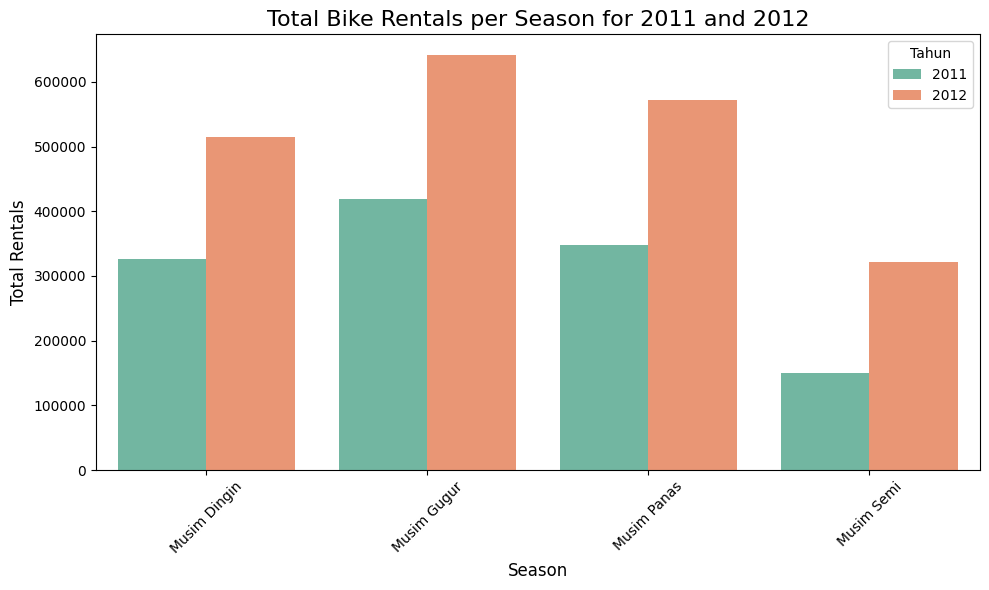

In [229]:
data_day['TanggalWaktu'] = pd.to_datetime(data_day['TanggalWaktu'])
data_2011_2012 = data_day[data_day['TanggalWaktu'].dt.year.isin([2011, 2012])]

# Pengelompokan data berdasarkan musim dan tahun untuk menghitung total sewa untuk setiap musim
season_rentals = data_2011_2012.groupby([data_2011_2012['TanggalWaktu'].dt.year, 'Musim'])['Jumlah'].sum().reset_index()
season_rentals.columns = ['Tahun', 'Musim', 'Jumlah']

# Plot untuk data
plt.figure(figsize=(10, 6))
sns.barplot(x='Musim', y='Jumlah', hue='Tahun', data=season_rentals, palette='Set2')
plt.title('Total Bike Rentals per Season for 2011 and 2012', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


**Insight:**

*Tahun 2011*
1. Musim Dingin : Jumlah penyewaan sepeda pada musim dingin tahun 2011 adalah yang paling rendah kedua dibandingkan musim lainnya, sekitar 300.000 penyewaan.
2. Musim Gugur : Musim gugur menunjukkan peningkatan jumlah penyewaan dibandingkan musim dingin, dengan total sekitar 450.000 penyewaan. Musim gugur cenderung memiliki suhu yang lebih nyaman, sehingga lebih banyak orang yang menyewa sepeda.
3. Musim Panas : Pada musim panas, terjadi penyewaan yang signifikan, mencapai hampir 600.000 penyewaan. Ini adalah musim dengan jumlah penyewaan tertinggi di tahun 2011, mengindikasikan bahwa cuaca hangat dan hari yang lebih panjang mendukung lebih banyak aktivitas di luar ruangan seperti bersepeda.
4. Musim Semi : Musim semi memiliki jumlah penyewaan sepeda yang lebih rendah, dengan total sekitar 150.000 penyewaan. Meskipun suhu mulai menghangat, jumlah ini masih jauh lebih rendah dibandingkan musim panas dan musim gugur.

*Tahun 2012*
1. Musim Dingin : Pada musim dingin 2012, terjadi peningkatan signifikan dalam jumlah penyewaan sepeda dibandingkan tahun 2011, mencapai sekitar 500.000 penyewaan. 
2. Musim Gugur : Musim gugur di tahun 2012 menunjukkan peningkatan lebih lanjut dalam jumlah penyewaan, sekitar 600.000 penyewaan. Ini menunjukkan bahwa musim gugur tetap populer untuk penyewaan sepeda, dengan jumlah peningkatan dibandingkan tahun sebelumnya.
3. Musim Panas : Seperti pada tahun 2011, musim panas 2012 juga menjadi puncak jumlah penyewaan sepeda tertinggi, bahkan lebih tinggi dari tahun 2011, dengan lebih dari 650.000 penyewaan. Musim panas ini adalah yang paling aktif sepanjang tahun, menunjukkan bahwa layanan sepeda sangat diminati di musim ini.
4. Musim Semi : Musim semi pada tahun 2012 mengalami peningkatan yang signifikan dibandingkan dengan tahun 2011, dengan jumlah penyewaan mencapai lebih dari 250.000. Ini menunjukkan perbaikan dalam penggunaan layanan sepeda pada musim semi, meskipun masih lebih rendah daripada musim panas dan gugur.

### Pertanyaan 4: Jam berapa yang paling sering digunakan oleh penyewa kasual dan terdaftar untuk menyewa sepeda pada tahun 2011 dan 2012?

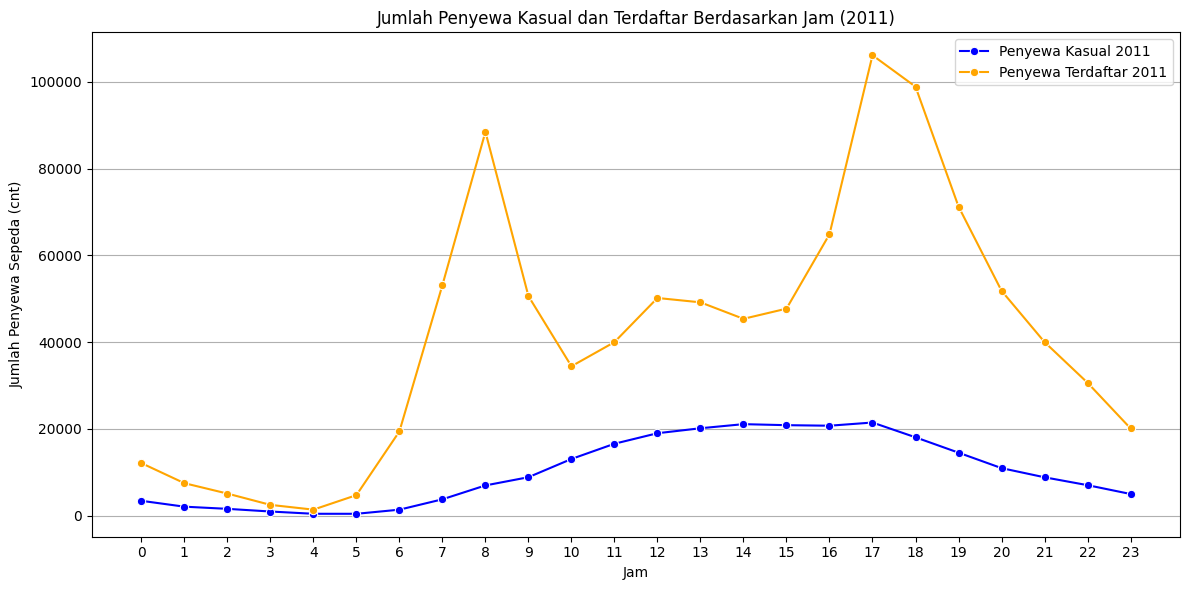

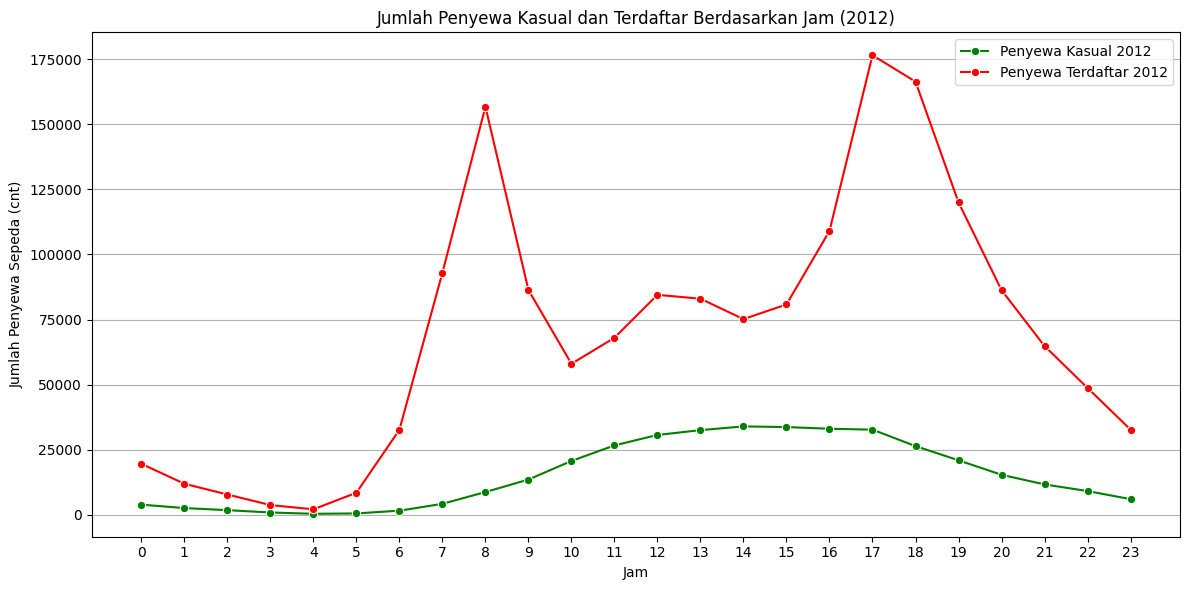

In [230]:
data_hour['TanggalWaktu'] = pd.to_datetime(data_hour['TanggalWaktu'])

data_hour_2011 = data_hour[data_hour['TanggalWaktu'].dt.year == 2011]
data_hour_2012 = data_hour[data_hour['TanggalWaktu'].dt.year == 2012]

# Agregasi data berdasarkan jam untuk tahun 2011
data_agg_hour_2011 = data_hour_2011.groupby('Jam').agg({'Kasual': 'sum', 'Terdaftar': 'sum'}).reset_index()

# Agregasi data berdasarkan jam untuk tahun 2012
data_agg_hour_2012 = data_hour_2012.groupby('Jam').agg({'Kasual': 'sum', 'Terdaftar': 'sum'}).reset_index()

# Membuat visualisasi untuk tahun 2011
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_agg_hour_2011, x='Jam', y='Kasual', marker='o', color='blue', label='Penyewa Kasual 2011')
sns.lineplot(data=data_agg_hour_2011, x='Jam', y='Terdaftar', marker='o', color='orange', label='Penyewa Terdaftar 2011')
plt.title('Jumlah Penyewa Kasual dan Terdaftar Berdasarkan Jam (2011)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa Sepeda (cnt)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Membuat visualisasi untuk tahun 2012
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_agg_hour_2012, x='Jam', y='Kasual', marker='o', color='green', label='Penyewa Kasual 2012')
sns.lineplot(data=data_agg_hour_2012, x='Jam', y='Terdaftar', marker='o', color='red', label='Penyewa Terdaftar 2012')
plt.title('Jumlah Penyewa Kasual dan Terdaftar Berdasarkan Jam (2012)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa Sepeda (cnt)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:**


- *Tahun 2011 :*
Penyewa Terdaftar (orange) menunjukkan dua puncak utama, yaitu sekitar pukul 8 pagi dan pukul 5 sore. Ini bisa mengindikasikan bahwa penyewa terdaftar menggunakan sepeda untuk perjalanan terkait pekerjaan atau aktivitas harian lainnya, seperti pergi dan pulang kerja.
Penyewa Kasual (biru) memiliki pola yang lebih stabil dengan sedikit kenaikan di sore hari, meskipun jumlahnya secara signifikan lebih rendah dibanding penyewa terdaftar. Penyewa kasual mungkin lebih cenderung menggunakan sepeda untuk rekreasi daripada keperluan rutin harian.

- *Tahun 2012 :*
Penyewa Terdaftar (merah) memperlihatkan pola yang hampir sama dengan tahun 2011, dengan dua puncak yang jelas pada pukul 8 pagi dan 5 sore, meskipun jumlah penyewa terdaftar pada 2012 meningkat secara keseluruhan dibandingkan 2011.
Penyewa Kasual (hijau), seperti pada tahun 2011, juga memperlihatkan pola penggunaan yang lebih merata sepanjang hari, meskipun ada peningkatan jumlah penyewa kasual pada jam-jam sore.

## Conclusion

- Conclution pertanyaan 1 : Dari visualisasi tersebut dapat disimpulkan bahwa pada tahun 2011 dan 2012, penyewa terdaftar selalu mendominasi dan terjadi penurunan proporsi penyewa kasual dari tahun 2011 ke 2012.

- Conclution pertanyaan 2 : Dari visuaalisasi tersebut dapat disimpulkan bahwa tahun 2011 Pengguna kasual lebih banyak menggunakan sepeda pada hari libur daripada hari kerja, dengan perbedaan yang signifikan. Pada tahun 2012 baik hari kerja maupun hari libur, terdapat peningkatan jumlah rata-rata pengguna kasual. Namun, meskipun perbedaannya tidak setajam di 2011, hari libur tetap menjadi hari yang paling banyak pengguna kasual menyewa sepeda.

- Conclution pertanyaan 3 : Dari visuaalisasi tersebut dapat disimpulkan bahwa tahun 2011 pola penyewaan menunjukkan musim panas sebagai musim teraktif, sementara musim semi memiliki jumlah penyewa yang lebih rendah. Pada tahun 2012 terdapat peningkatan yang signifikan dalam jumlah penyewaan untuk semua musim dibandingkan tahun 2011. Puncak aktivitas yang terjadi pada musim panas, dengan musim gugur dan dingin juga mengalami peningkatan yang signifikan. 

- Conclution pertanyaan 4 : Dari visuaalisasi tersebut dapat disimpulkan bahwa penyewa terdaftar cenderung menggunakan sepeda pada waktu-waktu yang lebih spesifik (puncak pada jam-jam sibuk seperti pagi dan sore hari), sedangkan penyewa kasual lebih merata dan rendah penggunaannya. Pada tahun 2012 menunjukkan peningkatan penyewa baik kasual maupun terdaftar dibandingkan tahun 2011, dengan penyewa terdaftar menunjukkan lonjakan yang lebih signifikan. Waktu puncak penggunaan oleh penyewa terdaftar tetap sama di kedua tahun, menandakan pola yang konsisten pada jam-jam sibuk.

*Tambahan: Untuk membuat dashboard maka perlu mengubah data yang sudah diolah dan disimpan ke csv baru*

In [231]:
data_hour.to_csv('dashboard/data_hour.csv', index=False)
data_day.to_csv('dashboard/data_day.csv', index=False)